Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [1]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

# can not download follow files!

# !wget --no-check-certificate \
#     "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
#     -O "/tmp/happy-or-sad.zip"

# zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
# zip_ref.extractall("/tmp/h-or-s")
# zip_ref.close()

class myCallback(tf.keras.callbacks.Callback):# Your Code):
  # Your Code
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>DESIRED_ACCURACY):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True    
        
callbacks = myCallback()

In [2]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
# Your Code Here
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

# model.summary()

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])# Your Code Here #)

W0724 12:14:43.779323 4691744192 deprecation.py:506] From /anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0724 12:14:44.178617 4691744192 deprecation.py:323] From /anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen =  ImageDataGenerator(rescale=1/255)# Your Code Here

train_generator = train_datagen.flow_from_directory(
    './h-or-s/',  # This is the source directory for training images
    target_size=(150, 150),  # All images will be resized to 150x150
    batch_size=10,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
    
    # Your Code Here)
)
    
    
# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [4]:
# This code block should call model.fit_generator and train for
# a number of epochs. 
history = model.fit_generator(
    train_generator,
    steps_per_epoch=2,  
    epochs=15,
    verbose=1,
    callbacks = [callbacks]
      # Your Code Here)
)
    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/15
2/2 [==============================] - 2s 849ms/step - loss: 2.8351 - acc: 0.5500
Epoch 2/15
2/2 [==============================] - 0s 202ms/step - loss: 0.8085 - acc: 0.5500
Epoch 3/15
2/2 [==============================] - 0s 207ms/step - loss: 0.5846 - acc: 0.7000
Epoch 4/15
2/2 [==============================] - 0s 229ms/step - loss: 0.5746 - acc: 0.6500
Epoch 5/15
2/2 [==============================] - 0s 239ms/step - loss: 0.5123 - acc: 0.7000
Epoch 6/15
1/2 [==============>...............] - ETA: 0s - loss: 0.2036 - acc: 1.0000
Reached 99.9% accuracy so cancelling training!
2/2 [==============================] - 0s 184ms/step - loss: 0.1872 - acc: 1.0000


./h-or-s/happy/happy1-08.png


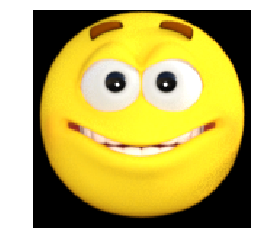

happy!


In [89]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random 
from keras.preprocessing import image

# predicting images
path = random.choice(train_generator.filepaths)
print(path)

#show picture
pictest = image.load_img(path, target_size=(150, 150))
plt.grid(False)
plt.axis('off')
plt.imshow(pictest)
plt.show()

#predict

img = pictest
x = image.img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
# print(classes[0])
if classes[0]>0.5:
    print("sad!")
else:
    print("happy!")